#### importing important libaries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.preprocessing.image import ImageDataGenerator

##### Importing Dataset 

In [4]:
train=pd.read_csv("fashion-mnist_train.csv")
test=pd.read_csv("fashion-mnist_test.csv")

In [5]:
print(train.head())
print(test.head())

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         

## Data preprocessing  

In [6]:
print(train.shape)
print(test.shape)

(60000, 785)
(10000, 785)


In [7]:
train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [8]:
test.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [9]:
y=train["label"]
X=train.drop(labels="label",axis=1)
y_test=test["label"]
X_test=test.drop(labels="label",axis=1)

##### Normalisation 

In [10]:
X=X/255.0
X_test=X_test/255.0

#### Reshape rhe data

In [11]:
X=X.values.reshape(-1,28,28,1)
X_test=X_test.values.reshape(-1,28,28,1)

#### Applying Encoder 

In [12]:
y=to_categorical(y,num_classes=10)
y_test=to_categorical(y_test,num_classes=10)

Now splitting the data into training data and validation data

In [13]:
X_train,X_val,y_train,y_valid=train_test_split(X,y,test_size=0.2,random_state=42)

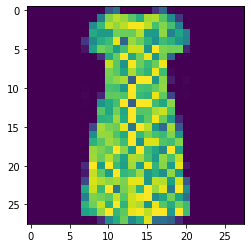

In [14]:
g = plt.imshow(X_train[5][:,:,0])

### CNN 

In [15]:
classifier=Sequential()
classifier.add(Convolution2D(filters=32,kernel_size=(5,5),padding="same",activation="relu",input_shape=(28,28,1)))
classifier.add(Convolution2D(filters=32,kernel_size=(5,5),padding="same",activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.50))               
               
classifier.add(Convolution2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
classifier.add(Convolution2D(filters=64,kernel_size=(3,3),padding="same",activation="relu"))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.25))               

In [16]:
classifier.add(Flatten())
classifier.add(Dense(units=256,activation="relu"))
classifier.add(Dropout(0.25))
classifier.add(Dense(units=10,activation="softmax"))

In [17]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [18]:
adam=tf.keras.optimizers.Adam(learning_rate=0.001,
                        beta_1=0.9,
                        beta_2=0.999,
                        epsilon=1e-07,
                        amsgrad=False,
                        name="Adam"
)
los=tf.keras.losses.CategoricalCrossentropy(from_logits=False,
                                            label_smoothing=0,
                                            reduction="auto",
                                            name="categorical_crossentropy"
)
classifier.compile(optimizer=adam,loss=los,metrics=["accuracy"])

In [19]:
train_datagen = ImageDataGenerator(featurewise_center=False,  # set input mean to 0 over the dataset
                                    samplewise_center=False,  # set each sample mean to 0
                                    featurewise_std_normalization=False,  # divide inputs by std of the dataset
                                    samplewise_std_normalization=False,  # divide each input by its std
                                    zca_whitening=False,  # apply ZCA whitening
                                    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
                                    zoom_range = 0.1, # Randomly zoom image 
                                    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                                    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
                                    horizontal_flip=False,  # randomly flip images
                                    vertical_flip=False)  # randomly flip images)

train_datagen.fit(X_train)
# fits the model on batches with real-time data augmentation:
history = classifier.fit_generator(train_datagen.flow(X_train,y_train, batch_size=86),
                              epochs = 10, validation_data = (X_val,y_valid),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // 86)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
558/558 - 156s - loss: 0.7189 - accuracy: 0.7287 - val_loss: 0.4229 - val_accuracy: 0.8382
Epoch 2/10
558/558 - 157s - loss: 0.4909 - accuracy: 0.8137 - val_loss: 0.3467 - val_accuracy: 0.8659
Epoch 3/10
558/558 - 173s - loss: 0.4361 - accuracy: 0.8370 - val_loss: 0.3258 - val_accuracy: 0.8740
Epoch 4/10
558/558 - 170s - loss: 0.4048 - accuracy: 0.8481 - val_loss: 0.3161 - val_accuracy: 0.8793
Epoch 5/10
558/558 - 166s - loss: 0.3811 - accuracy: 0.8579 - val_loss: 0.2766 - val_accuracy: 0.8929
Epoch 6/10
558/558 - 158s - loss: 0.3632 - accuracy: 0.8632 - val_loss: 0.2729 - val_accuracy: 0.8972
Epoch 7/10
558/558 - 157s - loss: 0.3542 - accuracy: 0.8662 - val_loss: 0.2757 - val_accuracy: 0.8940
Epoch 8/10
558/558 - 157s - loss: 0.3423 - accuracy: 0.8712 - val_loss: 0.2495 - val_accuracy: 0.9079
Epoch 9/10
558/558 - 157s - loss: 0.3382 - accuracy: 0.8741 - val_loss: 0.2509 - val_accuracy: 0.9055
Epoch 

In [21]:
score = classifier.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.225907564163208
Test accuracy: 0.9132000207901001


In [24]:
score

[0.225907564163208, 0.9132000207901001]